### A Citadel interview question from LinkedIn:
##### You have an urn with 2 red and 1 blue orbs. Each draw, you pick an orb at random and replace it with a blue one. What's the expected number of draws until all orbs are blue?

##### $E(\text{draws until 3 blue}) = \sum_{N=0}^{+\infty} N \times \mathcal P(N)$
##### Each probability term $\mathcal P(N)$ has a number of sub-terms equal to $N-1$ (i.e. the position of the first red draw, the second fixed at $N$). The probability for each of these $N-1$ terms (permutations) is given by $(2/3)^{N-i} \times (1/3)^i$, with $i$ being the position of the first red draw (e.g., $i=1$ first red draw is the first draw). Therefore:

$$ E(\text{draws until 3 blue}) = \sum_{N=0}^{+\infty} N \times \bigg [ \sum_{i=1}^{N-1} (2/3)^{N-i} \times (1/3)^i \bigg ] $$

##### It can be demonstrated that this converges to 4.5. I may add it later. Below a simple piece of code to prove the result.


In [53]:
import numpy as np
import matplotlib.pyplot as plt

In [54]:
# simulate the process to double check answer
# define histogram of initial condition
orbs_start = [0,1,1] # 0: Blue, 1: Red

# now simulate extraction
n = 100000
draws_all_blue = np.zeros(n, dtype=int)
for i in range(n):
    orbs = orbs_start.copy()
    while np.sum(orbs) != 0:
        # extract orb
        orb_drawn = np.random.choice(orbs)
        draws_all_blue[i] += 1
        if orb_drawn == 1:
            #find the first red orb and remove it 
            orbs[orbs.index(1)] = 0
        else: pass

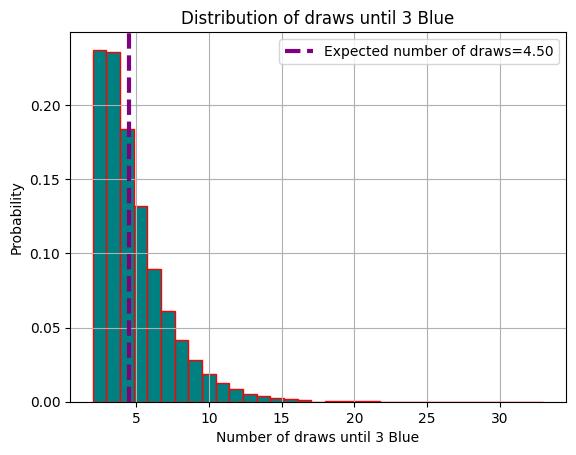

In [55]:
# plot distribution of draws
plt.hist(draws_all_blue, bins=max(draws_all_blue), density=True, color='teal', edgecolor='red', alpha=1)
plt.axvline(np.mean(draws_all_blue), color='purple', linestyle='dashed', linewidth=3, label='Expected number of draws={:.2f}'.format(np.mean(draws_all_blue)))
plt.xlabel('Number of draws until 3 Blue')
plt.ylabel('Probability')
plt.title('Distribution of draws until 3 Blue')
#plt.yscale('log')
plt.grid(True)
plt.legend(loc='upper right')
plt.show()